In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
Fertility_rate = pd.read_csv('Cleaned Data/Fertility rate CN and JP.CSV')
age_dependency = pd.read_csv('Cleaned Data/age_dependency.csv')
Chinese_gdp_data = pd.read_csv('Cleaned Data/CN_GDP_Overall_data.csv')
Japanese_gdp_data = pd.read_csv('Cleaned Data/JP_GDP_Overall_data.csv')
JP_demo = pd.read_csv('Cleaned Data/JP_demo.csv')
CN_demo = pd.read_csv('Cleaned Data/CN_demo.csv')
Age_14under = pd.read_csv('Cleaned Data/Age_14under.csv') 

In [3]:
Fertility_rate

,Year,"China Fertility rate, total (births per woman)","Japan Fertility rate, total (births per woman)",Fertility Rate
0,1960,5.756,2.001,5.505751
1,1961,5.905,2.050,5.489795
2,1962,6.062,2.010,5.490831
3,1963,6.206,2.020,5.489791
4,1964,6.320,2.050,5.452046
...,...,...,...,...
56,2016,1.675,1.440,2.747591
57,2017,1.683,1.430,2.707341
58,2018,1.690,1.420,2.676643
59,2019,1.696,1.360,2.642967


In [4]:
Fertility_rate.set_index('Year', inplace = True)

Text(0.5, 1.0, 'Chinese and Japanese Fertility rate')

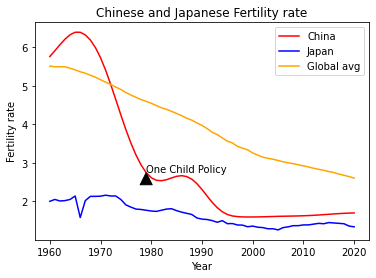

In [6]:
#Fertility rate between two countries and global average 
fig, ax = plt.subplots()
ax.plot(Fertility_rate.index,Fertility_rate['China Fertility rate, total (births per woman)'], 'red')
ax.annotate('One Child Policy', xy = (1979, 2.745),arrowprops=dict(facecolor='black', shrink=0.05))
ax.plot(Fertility_rate['Japan Fertility rate, total (births per woman)'], 'blue')
ax.plot(Fertility_rate['Fertility Rate'], 'orange')
ax.legend(['China', 'Japan', 'Global avg'])
ax.set_xlabel('Year')
ax.set_ylabel('Fertility rate')
ax.set_title('Chinese and Japanese Fertility rate')


In [7]:
Chinese_gdp = Chinese_gdp_data.set_index('Year').iloc[:, 1:]
Chinese_gdp.columns = ["Chiense GDP per Capita", 'Chinese GDP per Captia Growth']
Chinese_gdp

,Chiense GDP per Capita,Chinese GDP per Captia Growth
Year,,
1960,89.520542,NaN
1961,75.805838,-26.527644
1962,70.909412,-6.351505
1963,74.313643,7.622254
1964,85.498555,15.468995
...,...,...
2016,8094.363367,6.238215
2017,8816.986905,6.301863
2018,9905.342004,6.251701


In [8]:
Japanese_gdp = Japanese_gdp_data.set_index('Year').iloc[:, 1:]
Japanese_gdp.columns = ["Japanese GDP per Capita", 'Japanese GDP per Captia Growth']
Japanese_gdp
Chinese_gdp = Chinese_gdp_data.set_index('Year').iloc[:, 1:]
Chinese_gdp.columns = ["Chinese GDP per Capita", 'Chinese GDP per Captia Growth']
Chinese_gdp

,Chinese GDP per Capita,Chinese GDP per Captia Growth
Year,,
1960,89.520542,NaN
1961,75.805838,-26.527644
1962,70.909412,-6.351505
1963,74.313643,7.622254
1964,85.498555,15.468995
...,...,...
2016,8094.363367,6.238215
2017,8816.986905,6.301863
2018,9905.342004,6.251701


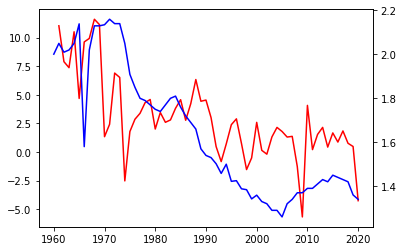

In [9]:
#Japan GDP per Capita Growth and Fertility rate 
fig, ax = plt.subplots()
ax.plot(Japanese_gdp.index, Japanese_gdp['Japanese GDP per Captia Growth'], 'red')
ax2 = ax.twinx()
ax2.plot( Fertility_rate.index, Fertility_rate['Japan Fertility rate, total (births per woman)'],'blue')

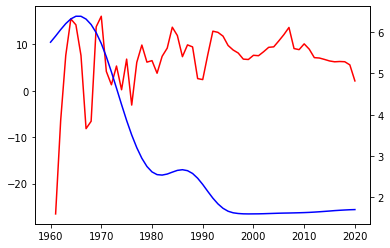

In [10]:
#Chinese GDP per Capita Growth and Fertility rate 
fig, ax = plt.subplots()
ax.plot(Chinese_gdp.index, Chinese_gdp['Chinese GDP per Captia Growth'], 'red')
ax2 = ax.twinx()
ax2.plot( Fertility_rate.index, Fertility_rate['China Fertility rate, total (births per woman)'],'blue')

In [11]:
Age = age_dependency.iloc[:,1:].set_index('Year')

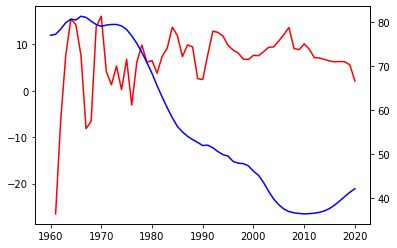

In [12]:
##China GDP per Capita Growth and Fertility rate 
fig, ax = plt.subplots()
ax.plot(Chinese_gdp.index, Chinese_gdp['Chinese GDP per Captia Growth'], 'red')
ax2 = ax.twinx()
ax2.plot(Age.index, Age['China'],'blue')

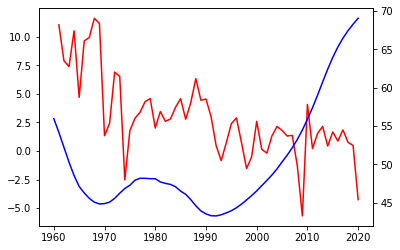

In [13]:
#
fig, ax = plt.subplots()
ax.plot(Japanese_gdp.index, Japanese_gdp['Japanese GDP per Captia Growth'], 'red')
ax2 = ax.twinx()
ax2.plot( y.index, y['Japan'],'blue')

In [14]:
age_dependency1 = age_dependency.set_index('Year').iloc[:,1:]
age_dependency1

,China,Japan,D Rate
Year,,,
1960,77.024680,55.969004,78.975530
1961,77.260002,54.173853,79.864276
1962,78.433757,52.241880,80.640761
1963,79.877719,50.299641,81.275930
1964,80.673601,48.557168,81.689391
...,...,...,...
2016,38.498875,65.306132,58.931652
2017,39.435946,66.455463,58.907094
2018,40.445269,67.429080,58.895158


In [15]:
Age_14under1 = Age_14under.set_index('Year')
Age_14under1

,China,Japan
Year,,
1960,39.822192,30.263900
1961,39.874431,29.409036
1962,40.282471,28.478359
1963,40.807495,27.520804
1964,41.139201,26.630508
...,...,...
2016,17.994616,12.914360
2017,17.937361,12.814390
2018,17.877003,12.696849


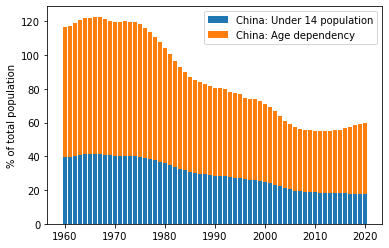

In [16]:
fig, ax = plt.subplots()
ax.bar(Age_14under1.index, Age_14under1['China'], label = 'China: Under 14 population')
ax.bar(age_dependency1.index, age_dependency1['China'], bottom =Age_14under1['China'], label = 'China: Age dependency')
ax.set_ylabel('% of total population')
ax.legend()
plt.show()


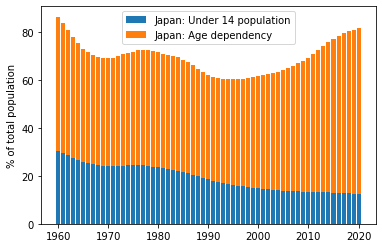

In [17]:
fig, ax = plt.subplots()
ax.bar(Age_14under1.index, Age_14under1['Japan'], label = 'Japan: Under 14 population')
ax.bar(age_dependency1.index, age_dependency1['Japan'], bottom =Age_14under1['Japan'], label = 'Japan: Age dependency' )
ax.set_ylabel('% of total population')
ax.legend()
plt.show()